<h3> What is Data Preprocessing ?</h3>
Data preprocessing is a data mining technique that involves transforming raw data into an understandable format.

<h3> Why we use Data Preprocessing ?</h3>
In Real world data are generally incomplete:lacking attribute values,lacking certain attributes of interest, or containing only aggregate data.
Noisy:containing errors or outliers.
Inconsistent:containing discrepancies in codes or name

![alt text](https://hackernoon.com/hn-images/1*-bqV4YyZtlz9EUxi8levjw.jpeg)

# Steps in Data Preprocessing

Step 1 : Import the libraries

Step 2 : Import the data-set

Step 3 : Check out the missing values

Step 4 : See the Categorical Values

Step 5 : Splitting the data-set into Training and Test Set

Step 6 : Feature Scaling

# Step 1 : Import the Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**NumPy** is the fundamental package for scientific computing with Python. It contains among other things:

1. A powerful N-dimensional array object

2. Sophisticated (broadcasting) functions

3. Tools for integrating C/C++ and FORTRAN code

4. Useful linear algebra, Fourier transform, and random number capabilities

**Pandas** is for data manipulation and analysis. Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python

**Matplotlib** is a Python 2D plotting library which produces publication quality figures in a variety of hard copy formats and interactive environments across platforms

**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics

**Warning** messages are typically issued in situations where it is useful to alert the user of some condition in a program, where that condition (normally) doesn’t warrant raising an exception and terminating the program. For example, one might want to issue a warning when a program uses an obsolete module.

# Step 2 : Import the Data-set

In [0]:

dataset = pd.read_csv('/content/Data.csv')

In [0]:
X = dataset.iloc[:,:-1].values  # upto second last column
y = dataset.iloc[:, 3].values

In [0]:
dataset.head(5)  #view the first n rows of data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [0]:
dataset.shape # shape of array in each dimension(row,column)

(10, 4)

In [0]:
dataset.dtypes #Different datatypes in the dataset

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [0]:
dataset.index # range of index in dataset

RangeIndex(start=0, stop=10, step=1)

In [0]:
dataset.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [0]:
dataset.size # size of dataset row*column

40

In [0]:
dataset.ndim # no. of array dimension(2D)

2

# Step 3 : Check out the Missing Values

The concept of missing values is important to understand in order to successfully manage data. If the missing values are not handled properly by the researcher, then he/she may end up drawing an inaccurate inference about the data

In [0]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

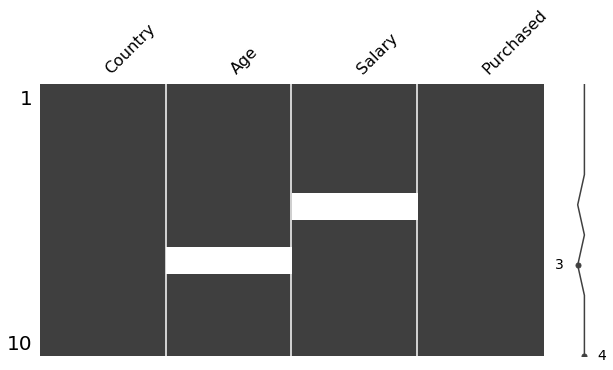

In [0]:
import missingno
missingno.matrix(dataset, figsize = (10,5))

You have seen here the number of missiong values in each column is 2.

**Two ways to handle Missing Values**



1.   This method commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 75% of missing values. This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

2.  This strategy can be applied on a feature which has numeric data like the year column or Home team goal column. We can calculate the mean, median or mode of the feature and replace it with the missing values. This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns. Replacing with the above three approximations are a statistical approach of handling the missing values. This method is also called as leaking the data while training. Another way is to approximate it with the deviation of neighbouring values. This works better if the data is linear.



In [0]:
dataset['Salary'].mean()

dataset['Salary'].tail()

dataset['Salary'].replace(np.NaN,dataset['Salary'].mean()).tail()


5    58000.0
6    52000.0
7    79000.0
8    83000.0
9    67000.0
Name: Salary, dtype: float64

# OR

### Handle missing data in your dataset with SciKit Imputer

In [0]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN',strategy='mean',axis = 0)
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(x[:, 1:3])

In [0]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Step 4 : See the Categorical Values

see how to deal with Categorical Data

In [0]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Since, machine learning models are based on Mathematical equations and you can intuitively understand that it would cause some problem if we can keep the Categorical data in the equations because we would only want numbers in the equations.

### **So, we need to encode the Categorical Variable…..**

### Like in our data set Country column will cause problem, so will convert into numerical values. To convert Categorical variable into Numerical data we can use *LabelEncoder()*  class from preprocessing library.

In [0]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() # make an object of Label Encoder

X[:,0] = label_encoder.fit_transform(X[:,0]) # fit and transfom or replace the categorical fata into Numerical data object to first column of matrix x.

In [0]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

But there is a problem in it, the problem is still the same, machine learning models are based on equations and that’s good that we replaced the text by numbers so that we can include the numbers in the equations.

However, since 1>0 and 2>1(See the above data-set) , the equations in the model will think that Spain has a higher value than Germany and France, and Germany has a higher value than France.

Actually, this is a not the case, these are actually three Categories and there is no relational order between the three. So , we have to prevent this, we’re going to use what are ***Dummy Variables***.

Dummy Variables is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.

Instead of having one column here above, we are going to have three column.

**Number of Columns = Number of Categories**

In [0]:
dummy = pd.get_dummies(dataset['Country'])
dummy

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [0]:
dataset = pd.concat([dataset,dummy],axis = 1)

dataset

,Country,Age,Salary,Purchased,France,Germany,Spain
0,France,44.0,72000.0,No,1,0,0
1,Spain,27.0,48000.0,Yes,0,0,1
2,Germany,30.0,54000.0,No,0,1,0
3,Spain,38.0,61000.0,No,0,0,1
4,Germany,40.0,NaN,Yes,0,1,0
5,France,35.0,58000.0,Yes,1,0,0
6,Spain,NaN,52000.0,No,0,0,1
7,France,48.0,79000.0,Yes,1,0,0
8,Germany,50.0,83000.0,No,0,1,0
9,France,37.0,67000.0,Yes,1,0,0


In [0]:
dataset.drop(['Country'],axis = 1)

,Age,Salary,Purchased,France,Germany,Spain
0,44.0,72000.0,No,1,0,0
1,27.0,48000.0,Yes,0,0,1
2,30.0,54000.0,No,0,1,0
3,38.0,61000.0,No,0,0,1
4,40.0,NaN,Yes,0,1,0
5,35.0,58000.0,Yes,1,0,0
6,NaN,52000.0,No,0,0,1
7,48.0,79000.0,Yes,1,0,0
8,50.0,83000.0,No,0,1,0
9,37.0,67000.0,Yes,1,0,0


# Step 5 : Splitting the data-set into Training and Test Set

### Well here it’s your algorithm model that is going to learn from your data to make predictions. Generally we split the data-set into 70:30 ratio or 80:20 what does it mean, 70 percent data take in train and 30 percent data take in test. However, this Splitting can be varies according to the data-set shape and size.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [0]:
X_train

array([[0, 44.0, 72000.0],
       [0, 37.0, 67000.0],
       [1, 40.0, 63777.77777777778],
       [2, 38.77777777777778, 52000.0],
       [2, 27.0, 48000.0],
       [0, 35.0, 58000.0],
       [2, 38.0, 61000.0],
       [1, 50.0, 83000.0]], dtype=object)

In [0]:
y_train

array(['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No'], dtype=object)

In [0]:
X_test

array([[0, 48.0, 79000.0],
       [1, 30.0, 54000.0]], dtype=object)

In [0]:
y_test

array(['Yes', 'No'], dtype=object)

# Step 6 : Feature Scaling

Feature scaling is the method to limit the range of variables so that they can be compared on common grounds.


The feature scaling just try to make the assumption that all the features has the equality opportunity to influence the weight, which more really reflects the information/knowledge you know about the data.
Commonly also result in better accuracy.

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
X_train

array([[-1.15470054,  0.84589101,  0.85247276],
       [-1.15470054, -0.27602759,  0.37370491],
       [ 0.        ,  0.20479466,  0.06516562],
       [ 1.15470054,  0.00890412, -1.06259865],
       [ 1.15470054, -1.87876845, -1.44561294],
       [-1.15470054, -0.59657576, -0.48807723],
       [ 1.15470054, -0.11575351, -0.20081652],
       [ 0.        ,  1.80753552,  1.90576204]])

In [0]:
X_test

array([[-1.15470054,  1.48698735,  1.52274776],
       [ 0.        , -1.39794619, -0.87109151]])